In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
five_shot_likelihoods = np.load("ckpts/base_model_few_shot_accuracy/mmlu/" + f"eval_A_to_D_probs.npy")
correct_answer_idxs = np.load("ckpts/base_model_few_shot_accuracy/mmlu/" + f"eval_answers.npy")

five_shot_likelihoods = five_shot_likelihoods[np.arange(0, len(five_shot_likelihoods)), correct_answer_idxs]
neg_log_likelihood_bins = [0, 0.02, 0.5, 1, 1.5, 2,]

neg_log_likelihoods = -np.log(five_shot_likelihoods)


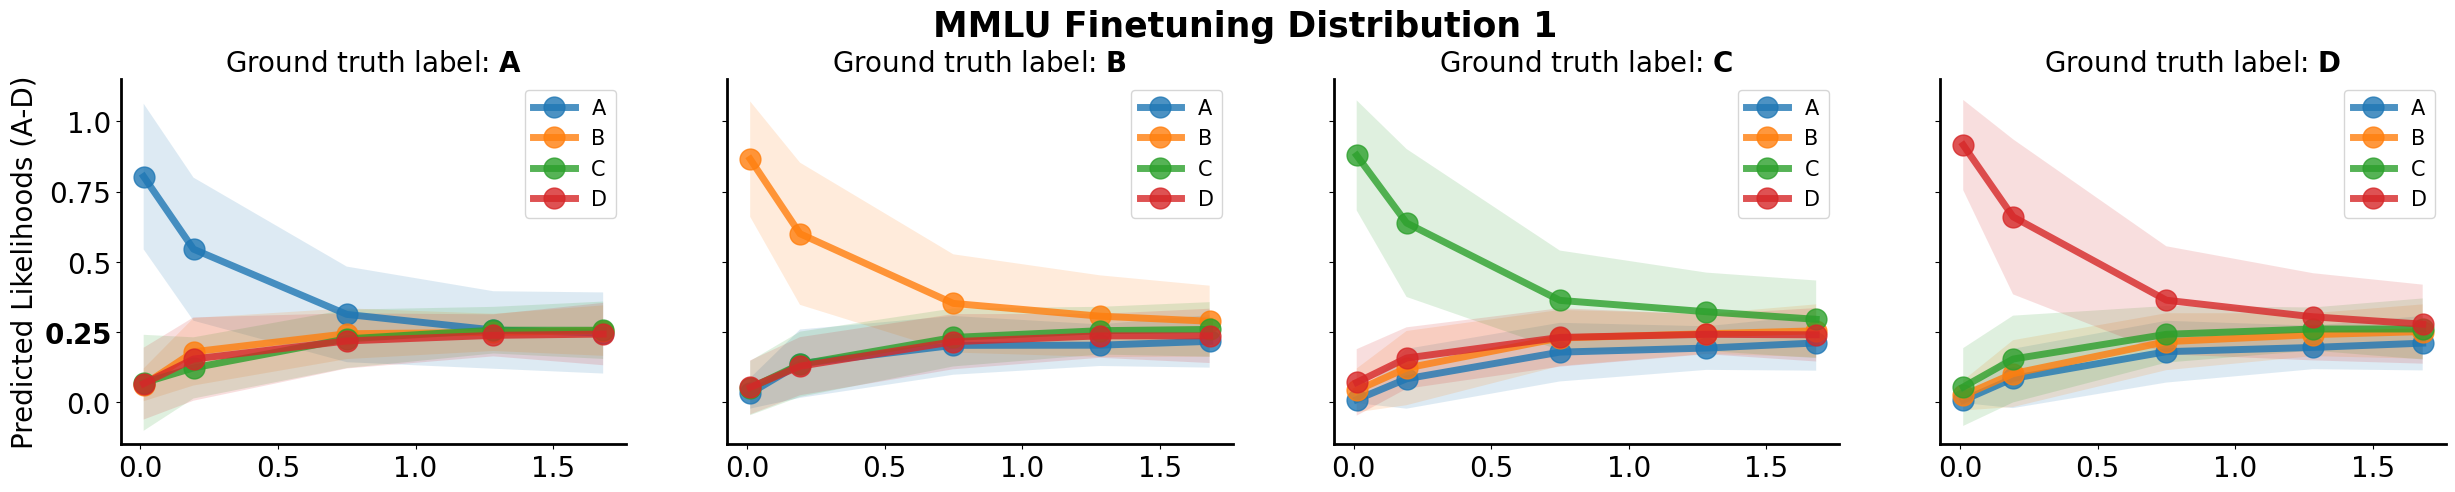

In [26]:


model_path = "ckpts/sft_mmlu/checkpoint_02000/hf_model/"
fig, axs = plt.subplots(1, 4, figsize=(30, 5), sharey=True, sharex=True)

labels = ["A", "B", "C", "D"]

for j in range(4):

    sft2_eval_A_to_D_probs = np.load(model_path + f"eval_A_to_D_probs_truth{labels[j]}.npy")
    sft2_neg_log_likelihoods = -np.log(sft2_eval_A_to_D_probs.max(-1))

    neg_log_likelihoods_bin_means = []

    A_to_D_likelihoods = {}
    A_to_D_likelihoods["A"] = []
    A_to_D_likelihoods["B"] = []
    A_to_D_likelihoods["C"] = []
    A_to_D_likelihoods["D"] = []

    A_to_D_likelihood_stds = {}
    A_to_D_likelihood_stds["A"] = []
    A_to_D_likelihood_stds["B"] = []
    A_to_D_likelihood_stds["C"] = []
    A_to_D_likelihood_stds["D"] = []
    for i in range(len(neg_log_likelihood_bins) - 1):
        bin_idxs = np.where((neg_log_likelihoods > neg_log_likelihood_bins[i]) & (neg_log_likelihoods < neg_log_likelihood_bins[i+1]))[0]
        A_to_D_likelihoods["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].mean())
        A_to_D_likelihoods["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].mean())
        A_to_D_likelihoods["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].mean())
        A_to_D_likelihoods["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].mean())

        A_to_D_likelihood_stds["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].std())
        A_to_D_likelihood_stds["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].std())
        A_to_D_likelihood_stds["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].std())
        A_to_D_likelihood_stds["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].std())
        neg_log_likelihoods_bin_means.append(neg_log_likelihoods[bin_idxs].mean())
    
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["A"], "o-", label="A", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["A"]) - np.array(A_to_D_likelihood_stds["A"]), np.array(A_to_D_likelihoods["A"]) + np.array(A_to_D_likelihood_stds["A"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["B"], "o-", label="B", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["B"]) - np.array(A_to_D_likelihood_stds["B"]), np.array(A_to_D_likelihoods["B"]) + np.array(A_to_D_likelihood_stds["B"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["C"], "o-", label="C", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["C"]) - np.array(A_to_D_likelihood_stds["C"]), np.array(A_to_D_likelihoods["C"]) + np.array(A_to_D_likelihood_stds["C"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["D"], "o-", label="D", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["D"]) - np.array(A_to_D_likelihood_stds["D"]), np.array(A_to_D_likelihoods["D"]) + np.array(A_to_D_likelihood_stds["D"]), alpha=0.15)

    axs[j].legend(fontsize=15)
    axs[j].set_yticks([0 ,0.25, 0.5, 0.75, 1], [0.00 ,"$\mathbf{0.25}$", 0.5, 0.75, 1.0])
    axs[j].set_ylim([-0.15, 1.15])
    axs[j].xaxis.set_tick_params(labelsize=20)
    axs[j].yaxis.set_tick_params(labelsize=20)
    # axs[j].set_xlabel("Unfamiliarity Score", fontsize=20)
    if j==0:
        axs[j].set_ylabel("Predicted Likelihoods (A-D)", fontsize=20)
    axs[j].set_title("Ground truth label: $\mathbf{"+labels[j]+"}$", fontsize=20)
    axs[j].spines['bottom'].set_linewidth(2)
    axs[j].spines['left'].set_linewidth(2)

    axs[j].spines['top'].set_visible(False)
    axs[j].spines['right'].set_visible(False)
    
fig.suptitle("MMLU Finetuning Distribution 1", fontsize=25, weight="bold")
plt.subplots_adjust(top=0.84) 

plt.savefig("figures/mmlu_sft1.png", bbox_inches='tight', dpi=1000)


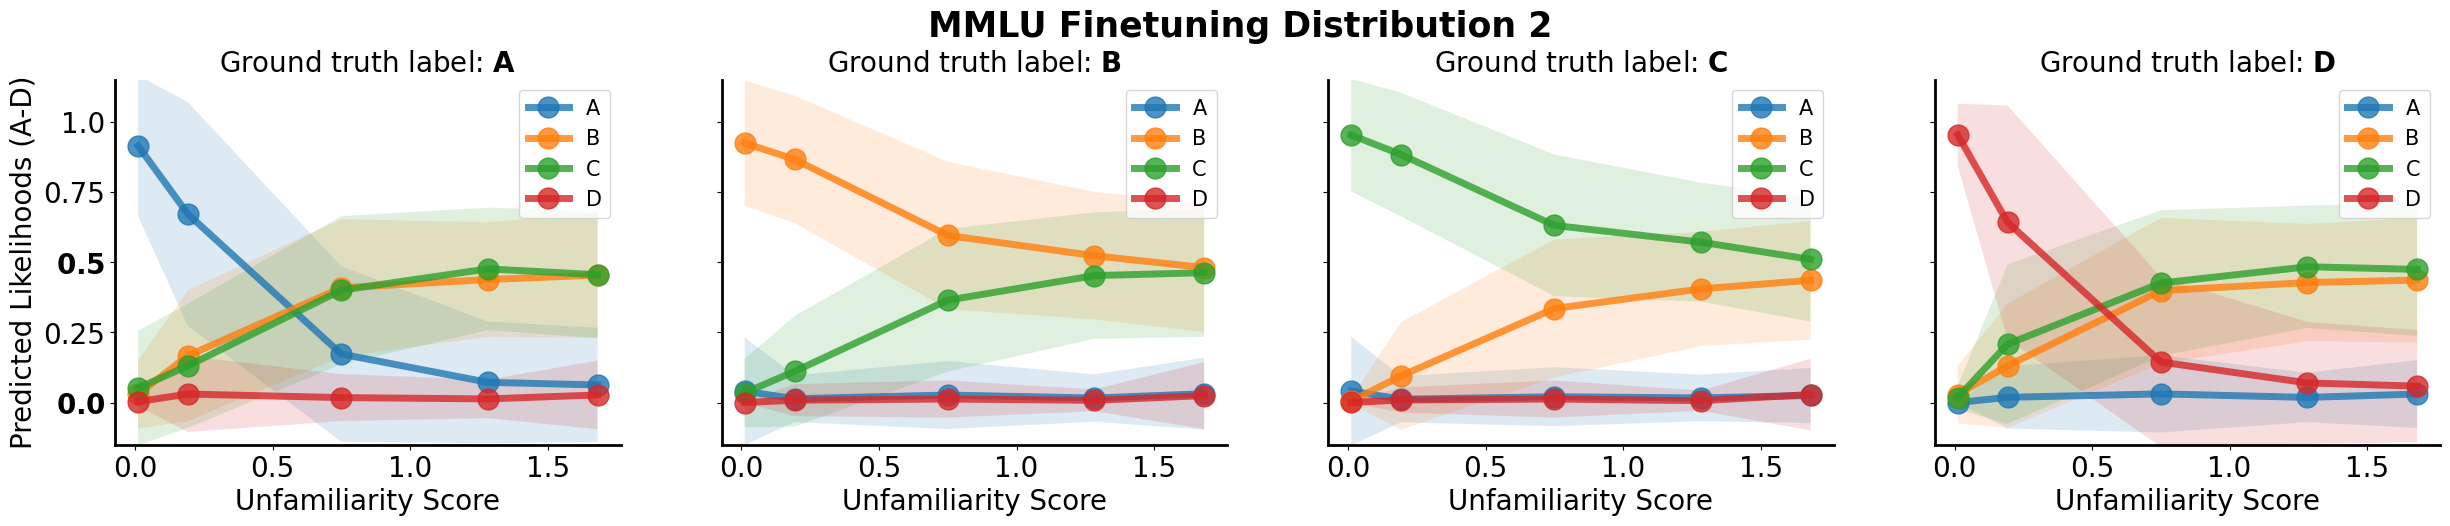

In [27]:


model_path = "ckpts/sft_mmlu_unfamiliar_0pt7/checkpoint_02000/hf_model/"
fig, axs = plt.subplots(1, 4, figsize=(30, 5), sharey=True, sharex=True)

labels = ["A", "B", "C", "D"]

for j in range(4):

    sft2_eval_A_to_D_probs = np.load(model_path + f"eval_A_to_D_probs_truth{labels[j]}.npy")
    sft2_neg_log_likelihoods = -np.log(sft2_eval_A_to_D_probs.max(-1))

    neg_log_likelihoods_bin_means = []

    A_to_D_likelihoods = {}
    A_to_D_likelihoods["A"] = []
    A_to_D_likelihoods["B"] = []
    A_to_D_likelihoods["C"] = []
    A_to_D_likelihoods["D"] = []

    A_to_D_likelihood_stds = {}
    A_to_D_likelihood_stds["A"] = []
    A_to_D_likelihood_stds["B"] = []
    A_to_D_likelihood_stds["C"] = []
    A_to_D_likelihood_stds["D"] = []
    for i in range(len(neg_log_likelihood_bins) - 1):
        bin_idxs = np.where((neg_log_likelihoods > neg_log_likelihood_bins[i]) & (neg_log_likelihoods < neg_log_likelihood_bins[i+1]))[0]
        A_to_D_likelihoods["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].mean())
        A_to_D_likelihoods["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].mean())
        A_to_D_likelihoods["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].mean())
        A_to_D_likelihoods["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].mean())

        A_to_D_likelihood_stds["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].std())
        A_to_D_likelihood_stds["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].std())
        A_to_D_likelihood_stds["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].std())
        A_to_D_likelihood_stds["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].std())
        neg_log_likelihoods_bin_means.append(neg_log_likelihoods[bin_idxs].mean())
    
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["A"], "o-", label="A", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["A"]) - np.array(A_to_D_likelihood_stds["A"]), np.array(A_to_D_likelihoods["A"]) + np.array(A_to_D_likelihood_stds["A"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["B"], "o-", label="B", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["B"]) - np.array(A_to_D_likelihood_stds["B"]), np.array(A_to_D_likelihoods["B"]) + np.array(A_to_D_likelihood_stds["B"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["C"], "o-", label="C", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["C"]) - np.array(A_to_D_likelihood_stds["C"]), np.array(A_to_D_likelihoods["C"]) + np.array(A_to_D_likelihood_stds["C"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["D"], "o-", label="D", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["D"]) - np.array(A_to_D_likelihood_stds["D"]), np.array(A_to_D_likelihoods["D"]) + np.array(A_to_D_likelihood_stds["D"]), alpha=0.15)

    axs[j].legend(fontsize=15)
    axs[j].set_yticks([0 ,0.25, 0.5, 0.75, 1], ["$\mathbf{0.0}$" ,0.25, "$\mathbf{0.5}$", 0.75, 1.0])
    axs[j].set_ylim([-0.15, 1.15])
    axs[j].xaxis.set_tick_params(labelsize=20)
    axs[j].yaxis.set_tick_params(labelsize=20)
    axs[j].set_xlabel("Unfamiliarity Score", fontsize=20)
    if j==0:
        axs[j].set_ylabel("Predicted Likelihoods (A-D)", fontsize=20)
    axs[j].set_title("Ground truth label: $\mathbf{"+labels[j]+"}$", fontsize=20)
    axs[j].spines['bottom'].set_linewidth(2)
    axs[j].spines['left'].set_linewidth(2)

    axs[j].spines['top'].set_visible(False)
    axs[j].spines['right'].set_visible(False)
    
fig.suptitle('MMLU Finetuning Distribution 2', fontsize=25, weight="bold")
plt.subplots_adjust(top=0.84) 

plt.savefig("figures/mmlu_sft2.png", bbox_inches='tight', dpi=1000)

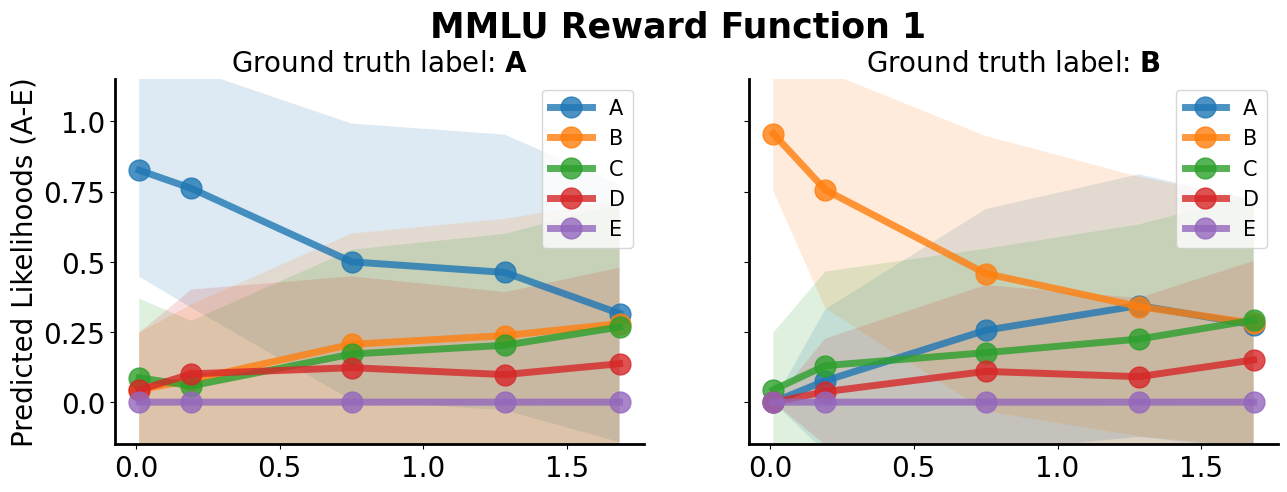

In [28]:

model_path = "ckpts/ppo_mmlu_llama7B_true2_false-3_hedge-3/checkpoint_010000/hf_model/"

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)

# labels = ["A", "B", "C", "D"]
labels = ["A", "B"]

for j in range(len(labels)):

    sft2_eval_A_to_D_probs = np.load(model_path + f"eval_A_to_E_probs_truth{labels[j]}.npy")
    sft2_neg_log_likelihoods = -np.log(sft2_eval_A_to_D_probs.max(-1))

    neg_log_likelihoods_bin_means = []

    A_to_D_likelihoods = {}
    A_to_D_likelihoods["A"] = []
    A_to_D_likelihoods["B"] = []
    A_to_D_likelihoods["C"] = []
    A_to_D_likelihoods["D"] = []
    A_to_D_likelihoods["E"] = []

    A_to_D_likelihood_stds = {}
    A_to_D_likelihood_stds["A"] = []
    A_to_D_likelihood_stds["B"] = []
    A_to_D_likelihood_stds["C"] = []
    A_to_D_likelihood_stds["D"] = []
    A_to_D_likelihood_stds["E"] = []
    for i in range(len(neg_log_likelihood_bins) - 1):
        bin_idxs = np.where((neg_log_likelihoods > neg_log_likelihood_bins[i]) & (neg_log_likelihoods < neg_log_likelihood_bins[i+1]))[0]
        A_to_D_likelihoods["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].mean())
        A_to_D_likelihoods["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].mean())
        A_to_D_likelihoods["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].mean())
        A_to_D_likelihoods["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].mean())
        A_to_D_likelihoods["E"].append(sft2_eval_A_to_D_probs[bin_idxs, 4].mean())

        A_to_D_likelihood_stds["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].std())
        A_to_D_likelihood_stds["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].std())
        A_to_D_likelihood_stds["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].std())
        A_to_D_likelihood_stds["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].std())
        A_to_D_likelihood_stds["E"].append(sft2_eval_A_to_D_probs[bin_idxs, 4].std())
        neg_log_likelihoods_bin_means.append(neg_log_likelihoods[bin_idxs].mean())
    
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["A"], "o-", label="A", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["A"]) - np.array(A_to_D_likelihood_stds["A"]), np.array(A_to_D_likelihoods["A"]) + np.array(A_to_D_likelihood_stds["A"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["B"], "o-", label="B", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["B"]) - np.array(A_to_D_likelihood_stds["B"]), np.array(A_to_D_likelihoods["B"]) + np.array(A_to_D_likelihood_stds["B"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["C"], "o-", label="C", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["C"]) - np.array(A_to_D_likelihood_stds["C"]), np.array(A_to_D_likelihoods["C"]) + np.array(A_to_D_likelihood_stds["C"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["D"], "o-", label="D", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["D"]) - np.array(A_to_D_likelihood_stds["D"]), np.array(A_to_D_likelihoods["D"]) + np.array(A_to_D_likelihood_stds["D"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["E"], "o-", label="E", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["E"]) - np.array(A_to_D_likelihood_stds["E"]), np.array(A_to_D_likelihoods["E"]) + np.array(A_to_D_likelihood_stds["E"]), alpha=0.15)


    axs[j].legend(fontsize=15)
    axs[j].set_yticks([0 ,0.25, 0.5, 0.75, 1],[0. ,0.25, 0.5, 0.75, 1.])
    axs[j].set_ylim([-0.15, 1.15])
    axs[j].xaxis.set_tick_params(labelsize=20)
    axs[j].yaxis.set_tick_params(labelsize=20)
    if j==0:
        axs[j].set_ylabel("Predicted Likelihoods (A-E)", fontsize=20)
    axs[j].set_title("Ground truth label: $\mathbf{"+labels[j]+"}$", fontsize=20)
    axs[j].spines['bottom'].set_linewidth(2)
    axs[j].spines['left'].set_linewidth(2)

    axs[j].spines['top'].set_visible(False)
    axs[j].spines['right'].set_visible(False)


fig.suptitle('MMLU Reward Function 1', fontsize=25, weight="bold")
plt.subplots_adjust(top=0.84) 

plt.savefig("figures/mmlu_rl1.png", bbox_inches='tight', dpi=1000)

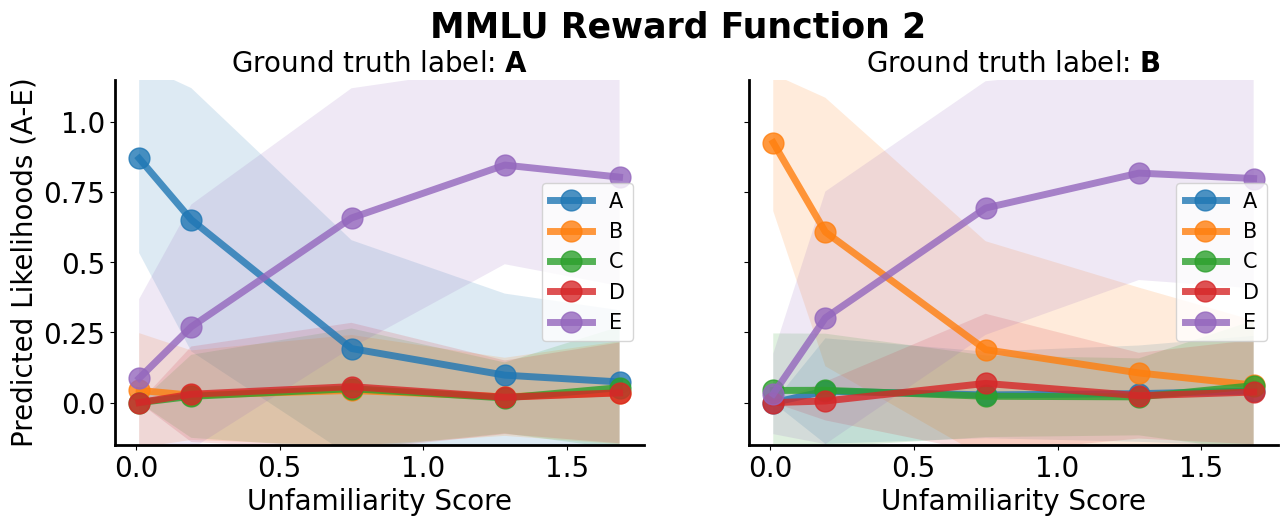

In [29]:

model_path = "ckpts/ppo_mmlu_llama7B_true2_false-3_hedge0/checkpoint_010000/hf_model/"


fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)

# labels = ["A", "B", "C", "D"]
labels = ["A", "B"]

for j in range(len(labels)):

    sft2_eval_A_to_D_probs = np.load(model_path + f"eval_A_to_E_probs_truth{labels[j]}.npy")
    sft2_neg_log_likelihoods = -np.log(sft2_eval_A_to_D_probs.max(-1))

    neg_log_likelihoods_bin_means = []

    A_to_D_likelihoods = {}
    A_to_D_likelihoods["A"] = []
    A_to_D_likelihoods["B"] = []
    A_to_D_likelihoods["C"] = []
    A_to_D_likelihoods["D"] = []
    A_to_D_likelihoods["E"] = []

    A_to_D_likelihood_stds = {}
    A_to_D_likelihood_stds["A"] = []
    A_to_D_likelihood_stds["B"] = []
    A_to_D_likelihood_stds["C"] = []
    A_to_D_likelihood_stds["D"] = []
    A_to_D_likelihood_stds["E"] = []
    for i in range(len(neg_log_likelihood_bins) - 1):
        bin_idxs = np.where((neg_log_likelihoods > neg_log_likelihood_bins[i]) & (neg_log_likelihoods < neg_log_likelihood_bins[i+1]))[0]
        A_to_D_likelihoods["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].mean())
        A_to_D_likelihoods["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].mean())
        A_to_D_likelihoods["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].mean())
        A_to_D_likelihoods["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].mean())
        A_to_D_likelihoods["E"].append(sft2_eval_A_to_D_probs[bin_idxs, 4].mean())

        A_to_D_likelihood_stds["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].std())
        A_to_D_likelihood_stds["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].std())
        A_to_D_likelihood_stds["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].std())
        A_to_D_likelihood_stds["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].std())
        A_to_D_likelihood_stds["E"].append(sft2_eval_A_to_D_probs[bin_idxs, 4].std())
        neg_log_likelihoods_bin_means.append(neg_log_likelihoods[bin_idxs].mean())
    
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["A"], "o-", label="A", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["A"]) - np.array(A_to_D_likelihood_stds["A"]), np.array(A_to_D_likelihoods["A"]) + np.array(A_to_D_likelihood_stds["A"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["B"], "o-", label="B", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["B"]) - np.array(A_to_D_likelihood_stds["B"]), np.array(A_to_D_likelihoods["B"]) + np.array(A_to_D_likelihood_stds["B"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["C"], "o-", label="C", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["C"]) - np.array(A_to_D_likelihood_stds["C"]), np.array(A_to_D_likelihoods["C"]) + np.array(A_to_D_likelihood_stds["C"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["D"], "o-", label="D", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["D"]) - np.array(A_to_D_likelihood_stds["D"]), np.array(A_to_D_likelihoods["D"]) + np.array(A_to_D_likelihood_stds["D"]), alpha=0.15)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["E"], "o-", label="E", linewidth=5, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["E"]) - np.array(A_to_D_likelihood_stds["E"]), np.array(A_to_D_likelihoods["E"]) + np.array(A_to_D_likelihood_stds["E"]), alpha=0.15)


    axs[j].legend(fontsize=15)
    axs[j].set_yticks([0 ,0.25, 0.5, 0.75, 1],[0. ,0.25, 0.5, 0.75, 1.])
    axs[j].set_ylim([-0.15, 1.15])
    axs[j].xaxis.set_tick_params(labelsize=20)
    axs[j].yaxis.set_tick_params(labelsize=20)
    axs[j].set_xlabel("Unfamiliarity Score", fontsize=20)
    if j==0:
        axs[j].set_ylabel("Predicted Likelihoods (A-E)", fontsize=20)
    axs[j].set_title("Ground truth label: $\mathbf{"+labels[j]+"}$", fontsize=20)
    axs[j].spines['bottom'].set_linewidth(2)
    axs[j].spines['left'].set_linewidth(2)

    axs[j].spines['top'].set_visible(False)
    axs[j].spines['right'].set_visible(False)


fig.suptitle('MMLU Reward Function 2', fontsize=25, weight="bold")
plt.subplots_adjust(top=0.84) 

plt.savefig("figures/mmlu_rl2.png", bbox_inches='tight', dpi=1000)

In [11]:
def get_bin_stats(x_axis, y_axis, bins):
    x_axis = np.array(x_axis)
    y_axis = np.array(y_axis)
    bin_avgs = []
    bin_stds = []
    x_avgs = []
    for i in range(len(bins)-1):
        idxs = np.where((x_axis >= bins[i]) & (x_axis < bins[i+1]))[0]
        # print(len(idxs))
        bin_avgs.append(np.mean(y_axis[idxs]))
        bin_stds.append(np.std(y_axis[idxs]))
        x_avgs.append(np.mean(x_axis[idxs]))
    return np.array(bin_avgs), np.array(bin_stds), np.array(x_avgs)

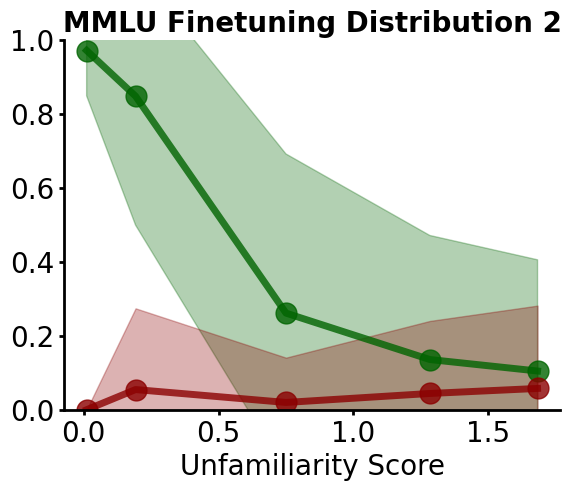

In [22]:
import os
import scipy

model_path = "ckpts/rm_mmlu_unfamiliar_incorrect/checkpoint_10000/hf_model/"
title_name = "MMLU Finetuning Distribution 2"
save_name = "mmlu_rm2"
# model_path = "ckpts/rm_mmlu_unfamiliar_correct/checkpoint_10000/hf_model/"
# title_name = "MMLU Finetuning Distribution 1"
# save_name = "mmlu_rm1"

logits = np.load(os.path.join(model_path, f"test_correct_only_logits.npy"))
logits = scipy.special.softmax(logits, axis=-1)


bin_avgs, bin_stds, x_avgs = get_bin_stats(neg_log_likelihoods, logits[:, 0], neg_log_likelihood_bins)

plt.plot(x_avgs, (bin_avgs), "o-", linewidth=5, markersize=15, alpha=0.8, color="darkgreen", label = "Ground-Truth Reward 1")
plt.fill_between(x_avgs, (bin_avgs-bin_stds), (bin_avgs+bin_stds), alpha=0.3, color="darkgreen")


logits = np.load(os.path.join(model_path, f"test_incorrect_only_logits.npy"))
logits = scipy.special.softmax(logits, axis=-1)

bin_avgs, bin_stds, x_avgs = get_bin_stats(neg_log_likelihoods, logits[:, 0], neg_log_likelihood_bins)

plt.plot(x_avgs, (bin_avgs), "o-", linewidth=5, markersize=15, alpha=0.8, color="darkred", label = "Ground-Truth Reward 0")
plt.fill_between(x_avgs, (bin_avgs-bin_stds), (bin_avgs+bin_stds), alpha=0.3, color="darkred")

# plt.ylabel("Predicted Likelihood of \nReward 1", fontsize=20)
plt.xlabel("Unfamiliarity Score", fontsize=20)
plt.title(title_name, fontsize=20, weight="bold")


plt.xticks([0., 0.5, 1., 1.5], fontsize=20)

plt.yticks(fontsize=20)
plt.tick_params(axis='both', which='major', width=2)

# remove top border
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.ylim(0, 1)

plt.savefig("figures/"+save_name+".png", bbox_inches='tight', dpi=300)

# add horizontal legend to top
# plt.legend(fontsize=20, loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2)


# plt.savefig("figures/"+"mmlu_rm_legend"+".png", bbox_inches='tight', dpi=300)
